In [ ]:
#미디어 캠페인 비용 예측치 데이터셋

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

import warnings
warnings.filterwarnings('ignore')

In [15]:
result_list = []
train = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('test.csv', index_col='id')
original = pd.read_csv('sample_submission.csv')

train.tail(10) #train data 총 360336개

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
id,,,,,,,,,,,,,,,,
360326,8.04,3.0,4.0,4.0,2.0,12.80,1.0,1.0,17.0,23688.0,1.0,1.0,1.0,1.0,1.0,67.11
360327,5.06,2.0,3.0,0.0,1.0,18.70,1.0,0.0,15.0,22478.0,1.0,0.0,0.0,0.0,0.0,107.20
360328,1.26,2.0,2.0,0.0,4.0,19.10,0.0,0.0,10.0,21215.0,1.0,0.0,0.0,0.0,0.0,91.28
360329,2.64,2.0,3.0,3.0,4.0,18.60,1.0,0.0,28.0,23688.0,1.0,0.0,1.0,1.0,1.0,85.88
360330,2.88,2.0,5.0,0.0,2.0,8.25,0.0,1.0,22.0,23593.0,0.0,0.0,0.0,0.0,0.0,119.26
360331,7.60,4.0,5.0,5.0,3.0,13.50,1.0,0.0,33.0,30268.0,0.0,0.0,0.0,0.0,0.0,133.42
360332,14.44,4.0,4.0,0.0,4.0,18.80,1.0,1.0,18.0,20319.0,0.0,0.0,0.0,0.0,0.0,81.85
360333,10.74,3.0,0.0,0.0,2.0,11.30,1.0,0.0,35.0,30584.0,1.0,1.0,1.0,1.0,1.0,87.07
360334,11.04,3.0,1.0,0.0,3.0,10.20,0.0,1.0,14.0,30584.0,1.0,1.0,1.0,1.0,1.0,146.72


In [18]:
test.head(10)

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
id,,,,,,,,,,,,,,,
360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0
360341,5.25,3.0,1.0,1.0,3.0,13.20,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
360342,3.72,4.0,4.0,0.0,4.0,14.40,1.0,0.0,4.0,23759.0,1.0,0.0,1.0,1.0,1.0
360343,7.68,4.0,2.0,0.0,3.0,19.90,0.0,0.0,20.0,30584.0,1.0,1.0,1.0,1.0,1.0
360344,9.63,3.0,3.0,1.0,4.0,7.87,1.0,0.0,6.0,33858.0,1.0,0.0,1.0,1.0,1.0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360336 entries, 0 to 360335
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   store_sales(in millions)    360336 non-null  float64
 1   unit_sales(in millions)     360336 non-null  float64
 2   total_children              360336 non-null  float64
 3   num_children_at_home        360336 non-null  float64
 4   avg_cars_at home(approx).1  360336 non-null  float64
 5   gross_weight                360336 non-null  float64
 6   recyclable_package          360336 non-null  float64
 7   low_fat                     360336 non-null  float64
 8   units_per_case              360336 non-null  float64
 9   store_sqft                  360336 non-null  float64
 10  coffee_bar                  360336 non-null  float64
 11  video_store                 360336 non-null  float64
 12  salad_bar                   360336 non-null  float64
 13  prepared_food 

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240224 entries, 360336 to 600559
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   store_sales(in millions)    240224 non-null  float64
 1   unit_sales(in millions)     240224 non-null  float64
 2   total_children              240224 non-null  float64
 3   num_children_at_home        240224 non-null  float64
 4   avg_cars_at home(approx).1  240224 non-null  float64
 5   gross_weight                240224 non-null  float64
 6   recyclable_package          240224 non-null  float64
 7   low_fat                     240224 non-null  float64
 8   units_per_case              240224 non-null  float64
 9   store_sqft                  240224 non-null  float64
 10  coffee_bar                  240224 non-null  float64
 11  video_store                 240224 non-null  float64
 12  salad_bar                   240224 non-null  float64
 13  prepared_

In [19]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240224 entries, 0 to 240223
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      240224 non-null  int64  
 1   cost    240224 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.7 MB


In [48]:
#결측치 확인
train.isnull().sum() #결측치 없음

store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
log_cost                      0
salad                         0
dtype: int64

In [49]:
#결측치 확인
test.isnull().sum() #결측치 없음

store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
salad                         0
dtype: int64

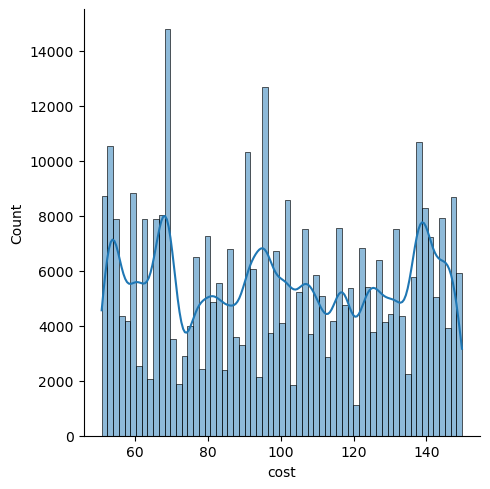

In [72]:
#numerical 변수인 float64, int64 타입을 뽑아서 displot 형태로 보기

num_cols = test.select_dtypes(include=['float64', 'int64']).columns.tolist()
sns.displot(train, x="cost", kde=True)

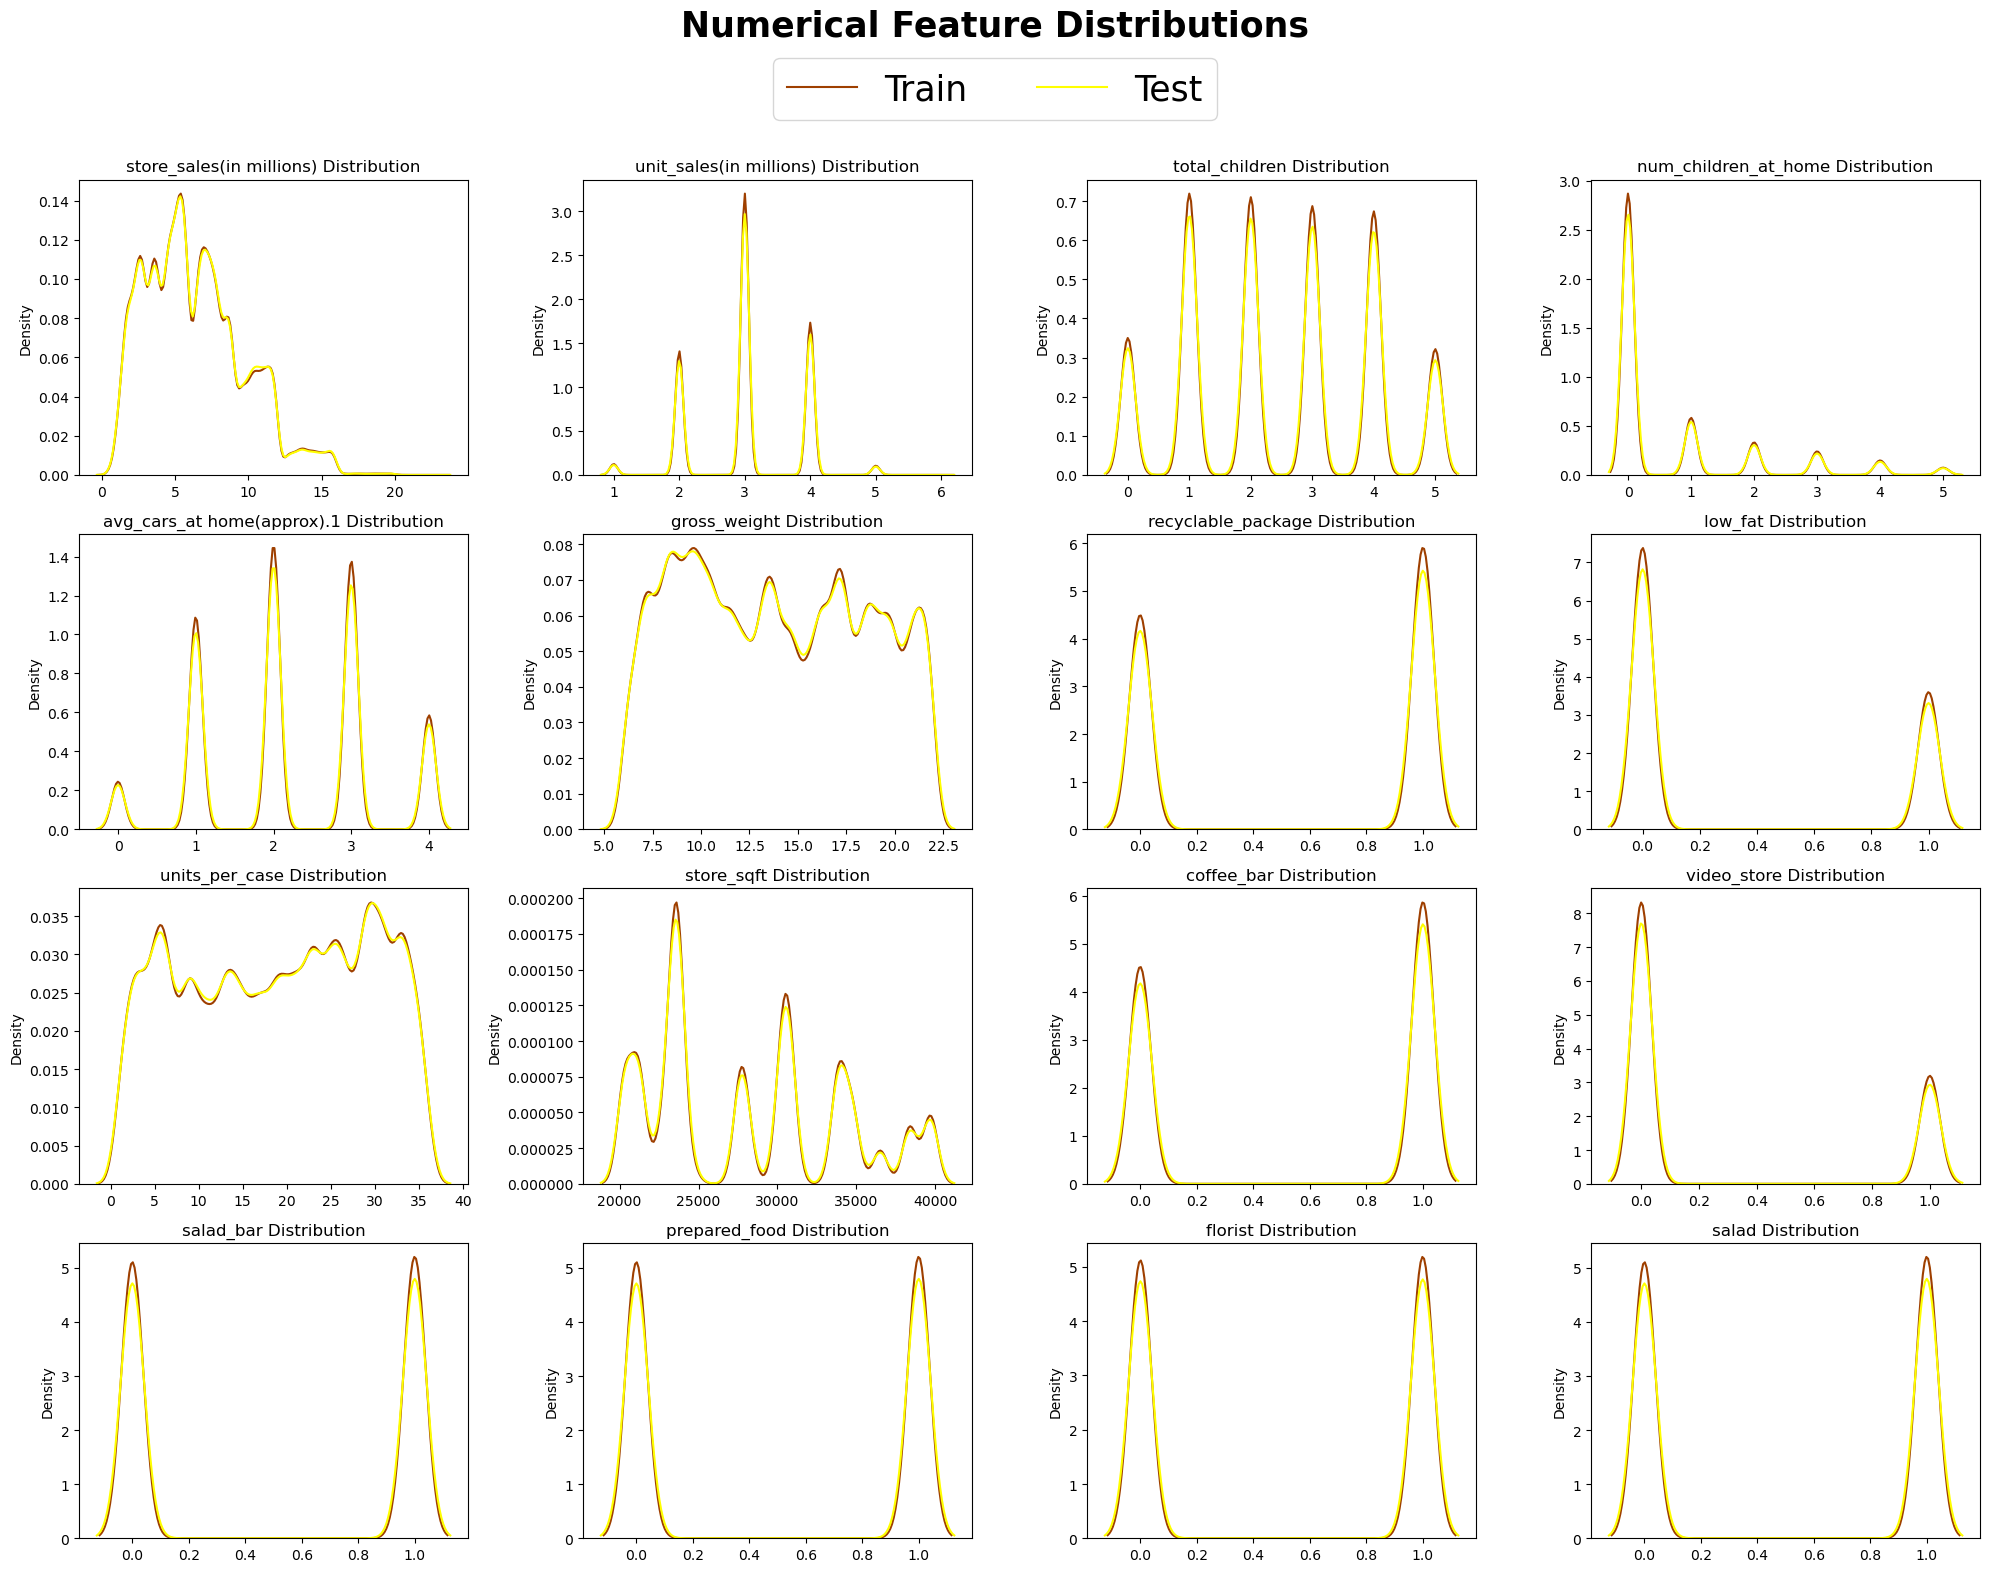

In [76]:
#check the distribution of X variables

import math
import numpy as np

features = num_cols
n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

columns = features
n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    sns.kdeplot(
        train[column], label="Train",
        ax = ax[i], color="#9E3F00"
    )
    
    sns.kdeplot(
        test[column], label='Test',
        ax=ax[i], color='yellow'
    )
    
    #titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
    
fig.suptitle(f'Numerical Feature Distributions\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=25, ncol=3)
plt.tight_layout()

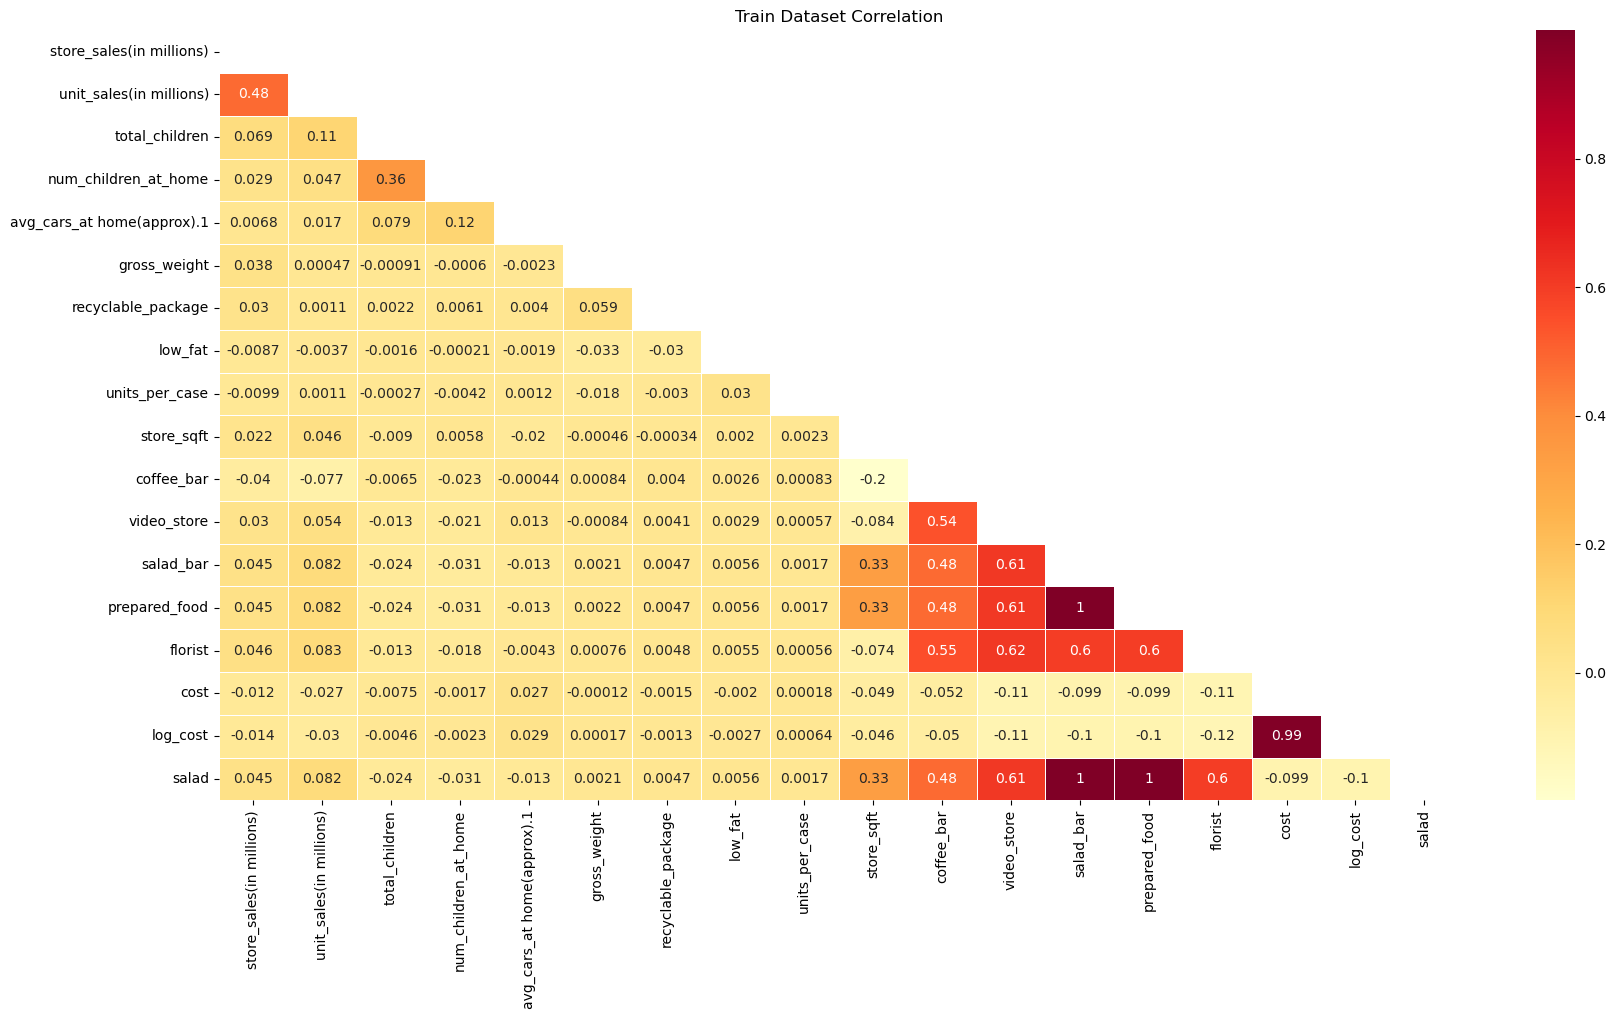

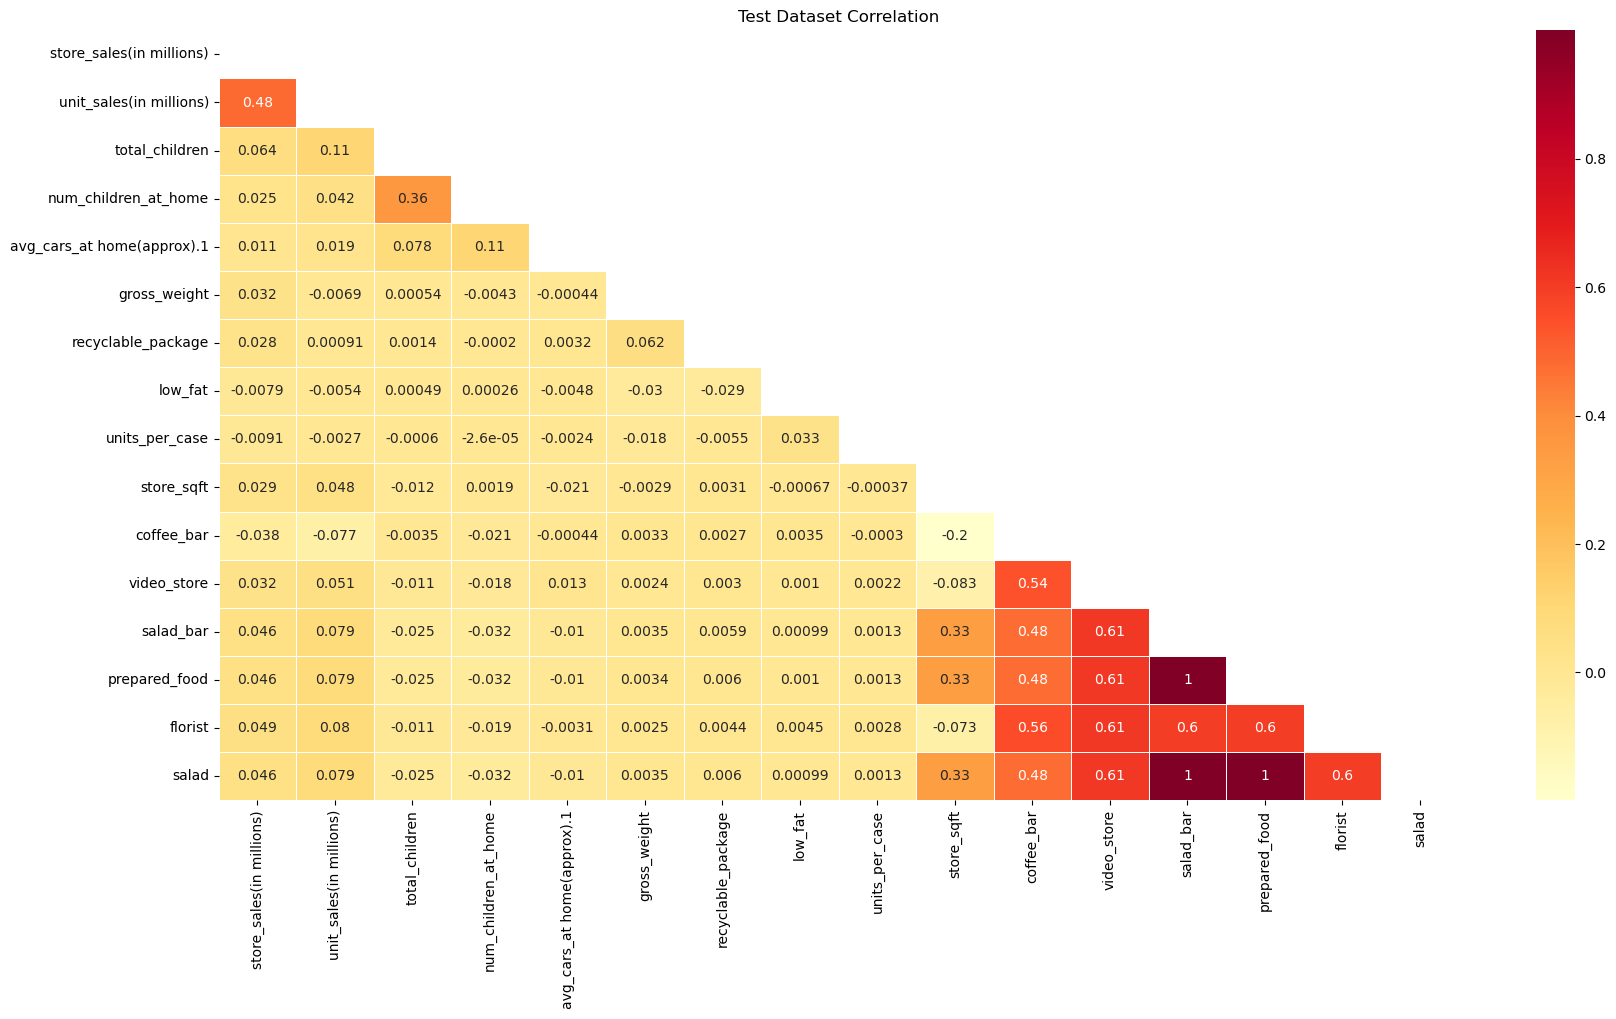

In [56]:
def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str='Train correlation') -> None:
    corr = df.corr()
    fig, axes = plt.subplots(figsize=(20, 10))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='YlOrRd', annot=True)
    plt.title(title_name)
    plt.show()

plot_correlation_heatmap(train, 'Train Dataset Correlation')
plot_correlation_heatmap(test, 'Test Dataset Correlation')

## Modeling with XGB

In [58]:
df = pd.concat([train, original])

In [59]:
#categorical 변수로 dummies 만들기

X = df.drop('cost', axis=1)
Y = df['cost']

In [66]:
#K-Fold 교차검증 설명

import numpy as np
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from xgboost import XGBRegressor

cv_scores = list()
importance_xgb = list()
preds = list()

## Running 3 fold CV
for i in range(3):
    print(f'{i} fold cv begin')
    skf = KFold(n_splits = 3, random_state = 1004, shuffle = True)
    
    for train_ix, test_ix in skf.split(X, Y):
        
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
                
        ## Building RF model
        XGB_md = XGBRegressor(tree_method = 'gpu_hist',
                              colsample_bytree = 0.8, 
                              gamma = 0.8, 
                              learning_rate = 0.01, 
                              max_depth = 6, 
                              min_child_weight = 10, 
                              n_estimators = 1000, 
                              subsample = 0.8).fit(X_train, Y_train)
        importance_xgb.append(XGB_md.feature_importances_)
        
        XGB_pred_1 = XGB_md.predict(X_test)
        XGB_pred_2 = XGB_md.predict(test)
        
        # Calculate RMSE
        cv_scores.append(mean_squared_log_error(Y_test, XGB_pred_1, squared = False))
        preds.append(XGB_pred_2)
        print(f'{i} fold cv done')

scores = np.mean(cv_scores)    
print('The average RMSE over 3-folds (run 3 times) is:', scores)

0 fold cv begin


XGBoostError: [15:53:32] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/gbm/../common/common.h:239: XGBoost version not compiled with GPU support.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x00000001377a1b15 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x00000001378a2c36 xgboost::gbm::GBTree::ConfigureUpdaters() + 534
  [bt] (2) 3   libxgboost.dylib                    0x000000013789d0fa xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > > const&) + 1130
  [bt] (3) 4   libxgboost.dylib                    0x00000001378bff9d xgboost::LearnerConfiguration::Configure() + 1229
  [bt] (4) 5   libxgboost.dylib                    0x00000001378c02d9 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 105
  [bt] (5) 6   libxgboost.dylib                    0x00000001377bd01f XGBoosterUpdateOneIter + 143
  [bt] (6) 7   libffi.7.dylib                      0x000000010975bead ffi_call_unix64 + 85
  [bt] (7) 8   ???                                 0x0000000301b0fd10 0x0 + 12913278224



K-Fold Cross Validation (교차 검증)

- K개의 fold를 만들어서 진행하는 교차검증

사용이유>
- 총 데이터 갯수가 적은 데이터 셋에 대하여 정확도를 향상시킬 수 있음
- 데이터 수가 적은데 검증과 테스트에 데이터를 더 뺏기면 underfitting 등 성능이 미달되는 모델이 학습된다

과정>
- 기존 과정과 같이 train/test data 나누기
- Training을 k개의 fold로 나눈다
- 한 개의 fold에 있는 데이터를 다시 k개로 쪼개고, k-1개는 training data, 마지막 한개는 validation data set으로 지정한다
- 모델을 생성하고 예측을 진행하여 에러값을 추출한다
- 다음 fold에서는 validation 셋을 바꿔서 지정하고, 이전 fold에서 validation 역할을 했던 set는 다시 training set로 활용한다
- k번 반복

## Feature engineering

In [21]:
for df in [train]:
    df['log_cost'] = np.log1p(df['cost'])
#.loglp() - 로그로 표현할 때 무한대의 값을 가지는 경우, 1+값으로 결과가 출력되도록 해주는 함수
target = 'log_cost'

for df in [train, test]:
    df['salad'] = (df['salad_bar'] + df['prepared_food'])/2

In [22]:
# 8가지 요소 select
most_important_features = ['total_children', 'num_children_at_home',
                           'avg_cars_at home(approx).1', 'store_sqft',
                           'coffee_bar', 'video_store', 'salad', 
                           'florist']

# 관련성있는 9가지 요소 select (가장 중요한 8가지에 하나 더 추가)
relevant_features = ['unit_sales(in millions)'] + most_important_features

## EDA: duplicates and the grouping trick

In [74]:
print("Unique values:")
for f in relevant_features:
    print(f"{f:26} {np.unique(train[f])}")

Unique values:
unit_sales(in millions)    [1. 2. 3. 4. 5. 6.]
total_children             [0. 1. 2. 3. 4. 5.]
num_children_at_home       [0. 1. 2. 3. 4. 5.]
avg_cars_at home(approx).1 [0. 1. 2. 3. 4.]
store_sqft                 [20319. 21215. 22478. 23112. 23593. 23598. 23688. 23759. 24597. 27694.
 28206. 30268. 30584. 30797. 33858. 34452. 34791. 36509. 38382. 39696.]
coffee_bar                 [0. 1.]
video_store                [0. 1.]
salad                      [0.  0.5 1. ]
florist                    [0. 1.]


In [24]:
tg = train.groupby(most_important_features).log_cost.agg(['mean', 'std', 'count']).sort_values('count')
print(f"There are {len(tg)} groups.")
tg.tail(20)

There are 3075 groups.


mean  \
total_children num_children_at_home avg_cars_at home(approx).1 store_sqft coffee_bar video_store salad florist             
2.0            0.0                  1.0                        33858.0    1.0        0.0         1.0   1.0      4.431123   
1.0            0.0                  3.0                        33858.0    1.0        0.0         1.0   1.0      4.635463   
3.0            0.0                  2.0                        21215.0    1.0        0.0         0.0   0.0      4.624104   
                                    1.0                        33858.0    1.0        0.0         1.0   1.0      4.378494   
0.0            0.0                  1.0                        27694.0    1.0        1.0         1.0   1.0      4.458753   
3.0            0.0                  1.0                        20319.0    0.0        0.0         0.0   0.0      4.617708   
1.0            0.0                  2.0                        23598.0    0.0        0.0         0.0   1.0      4.471473   
3.0            0.0                  2.0                        23598.0    0.0        0.0         0.0   1.0      4.598826   
1.0            0.0                  2.0                        30268.0    0.0        0.0         0.0   0.0      4.514182   
4.0            0.0                  1.0                        30268.0    0.0        0.0         0.0   0.0      4.616415   
                                    2.0                        27694.0    1.0        1.0         1.0   1.0      4.467303   
3.0            0.0                  2.0                        33858.0    1.0        0.0         1.0   1.0      4.538850   
1.0            0.0                  1.0                        30268.0    0.0        0.0         0.0   0.0      4.511898   
4.0            0.0                  3.0                        27694.0    1.0        1.0         1.0   1.0      4.416005   
1.0            0.0                  2.0                        21215.0    1.0        0.0         0.0   0.0      4.590567   
                                                               20319.0    0.0        0.0         0.0   0.0      4.515137   
                                    1.0                        21215.0    1.0        0.0         0.0   0.0      4.554539   
                                    2.0                        27694.0    1.0        1.0         1.0   1.0      4.322897   
                                                               30797.0    1.0        1.0         1.0   1.0      4.520480   
                                    1.0                        33858.0    1.0        0.0         1.0   1.0      4.521471   

                                                                                                                     std  \
total_children num_children_at_home avg_cars_at home(approx).1 store_sqft coffee_bar video_store salad florist             
2.0            0.0                  1.0                        33858.0    1.0        0.0         1.0   1.0      0.334193   
1.0            0.0                  3.0                        33858.0    1.0        0.0         1.0   1.0      0.345549   
3.0            0.0                  2.0                        21215.0    1.0        0.0         0.0   0.0      0.284473   
                                    1.0                        33858.0    1.0        0.0         1.0   1.0      0.344792   
0.0            0.0                  1.0                        27694.0    1.0        1.0         1.0   1.0      0.320614   
3.0            0.0                  1.0                        20319.0    0.0        0.0         0.0   0.0      0.350586   
1.0            0.0                  2.0                        23598.0    0.0        0.0         0.0   1.0      0.378715   
3.0            0.0                  2.0                        23598.0    0.0        0.0         0.0   1.0      0.358110   
1.0            0.0                  2.0                        30268.0    0.0        0.0         0.0   0.0      0.210268   
4.0            0.0     

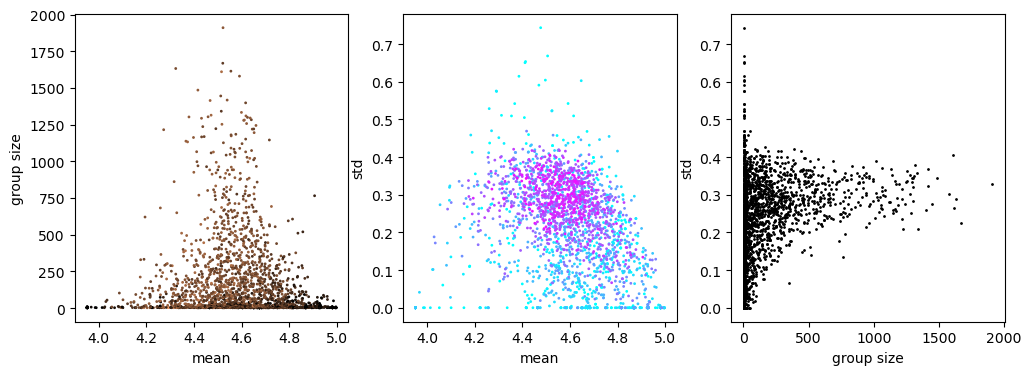

In [25]:
# Mean vs. group size
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(tg['mean'], tg['count'], s=1, c=tg['std'], cmap='copper')
# low std = black, high std = copper
plt.xlabel('mean')
plt.ylabel('group size')

# Mean vs. standard deviation
plt.subplot(1, 3, 2)
# small = cyan, large = magenta
plt.scatter(tg['mean'], tg['std'], s=1, c=np.log(tg['count']), cmap='cool')
plt.xlabel('mean')
plt.ylabel('std')

# Group size vs. standard deviation
plt.subplot(1, 3, 3)
plt.scatter(tg['count'], tg['std'], s=1, c='k', cmap='cool')
plt.xlabel('group size')
plt.ylabel('std')
plt.show()

In [75]:
#평균은 4.2~4.8 사이, 표준편차는 0.3 부근 

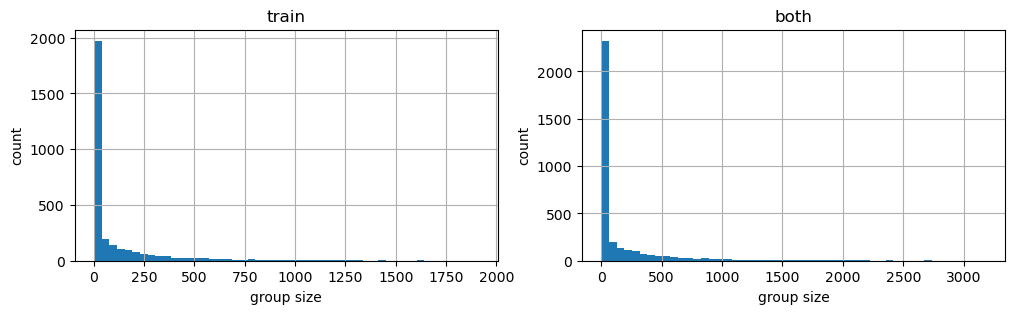

In [26]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('train')
tg['count'].hist(bins=50)
plt.xlabel('group size')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.title('both')
both = pd.concat([train, test], axis=0)
bg = both.groupby(most_important_features).total_children.agg(['count']).sort_values('count')
bg['count'].hist(bins=50)
plt.xlabel('group size')
plt.ylabel('count')
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

from datetime import datetime

In [45]:
def score_model(model, features_used, label=None, use_original=False):
    """Cross-validate a model"""
    start_time = datetime.datetime.now()
    score_list = []

    use_original = True

    oof = np.zeros_like(train[target], dtype=float)
    kf = KFold(shuffle=True, random_state=10)
    for fold, (idx_tr, idx_va) in enumerate(kf.split(train)):
        X_va = train.iloc[idx_va][features_used]
        y_va = train.iloc[idx_va][target]

        if use_original:
            fit_model_grouped(model, pd.concat([train.iloc[idx_tr], original], axis=0), features_used)
        else:
            fit_model_grouped(model, train.iloc[idx_tr], features_used)
            
        y_va_pred = model.predict(X_va)
        rmse = mean_squared_error(y_va, y_va_pred, squared=False)
        print(f"Fold {fold}: rmse = {rmse:.4f}")
        oof[idx_va] = y_va_pred
        score_list.append(rmse)

    rmse = sum(score_list) / len(score_list)
    execution_time = datetime.datetime.now() - start_time
    print(f"{Fore.GREEN}{Style.BRIGHT}Average rmse: {rmse:.5f} {label if label is not None else ''}{Style.RESET_ALL}")
    if label is not None:
        global result_list
        result_list.append((label, model, features_used, rmse, oof, execution_time, use_original))

In [71]:
from datetime import datetime
import time
import datetime

model = make_pipeline(ColumnTransformer([('ohe', OneHotEncoder(drop='first'), 
                                          ['total_children',
                                           'num_children_at_home', 'avg_cars_at home(approx).1',
                                           'store_sqft'])],
                                        remainder='passthrough'),
                      PolynomialFeatures(3, interaction_only=True, include_bias=False),
                      Ridge())
score_model(model, relevant_features, label=f'Onehot-Poly3-Ridge with unit_sales')

NameError: name 'fit_model_grouped' is not defined